# RAIA

### Libraries

In [1]:
#!pip install xgboost

In [2]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer 

from sklearn.metrics import silhouette_score as ss

import plotly.express as px

import itertools

from matplotlib import gridspec 

from sklearn.datasets import make_blobs

from seaborn import scatterplot as scatter

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm

import statsmodels.tsa.api as smtsa

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook

from itertools import product

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.metrics import median_absolute_error, mean_squared_log_error

from statsmodels.tsa.seasonal import seasonal_decompose

import xgboost as xgb

from matplotlib.pylab import rcParams

The dataset was retrivied on the following link:

https://finance.yahoo.com/quote/RADL3.SA/history

In [3]:
raia = pd.read_csv("RADL3.SA.csv", usecols=["Date", "Close"], index_col="Date", parse_dates=True)

print(raia)

                Close
Date                 
2020-01-02  22.082691
2020-01-03  21.590384
2020-01-06  21.165384
2020-01-07  20.875000
2020-01-08  21.153847
...               ...
2023-12-21  29.020000
2023-12-22  28.889999
2023-12-26  29.420000
2023-12-27  29.160000
2023-12-28  29.400000

[993 rows x 1 columns]


In [4]:
raia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 993 entries, 2020-01-02 to 2023-12-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   993 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


In [5]:
raia.head(1)

,Close
Date,
2020-01-02,22.082691


In [6]:
raia.tail(1)

,Close
Date,
2023-12-28,29.4


In [7]:
raia.describe()

,Close
count,993.000000
mean,23.462804
std,2.624914
min,17.490383
25%,21.634615
50%,23.125000
75%,25.000000
max,29.600000


Text(0.5, 1, 'PLOT 6: Close over time')

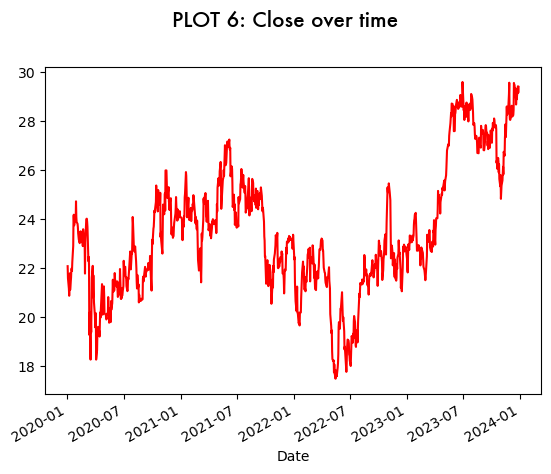

In [8]:
raia["Close"].plot(color = "red")
plt.suptitle("PLOT 6: Close over time", font = "Futura", fontsize = 15
             , y = 1)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

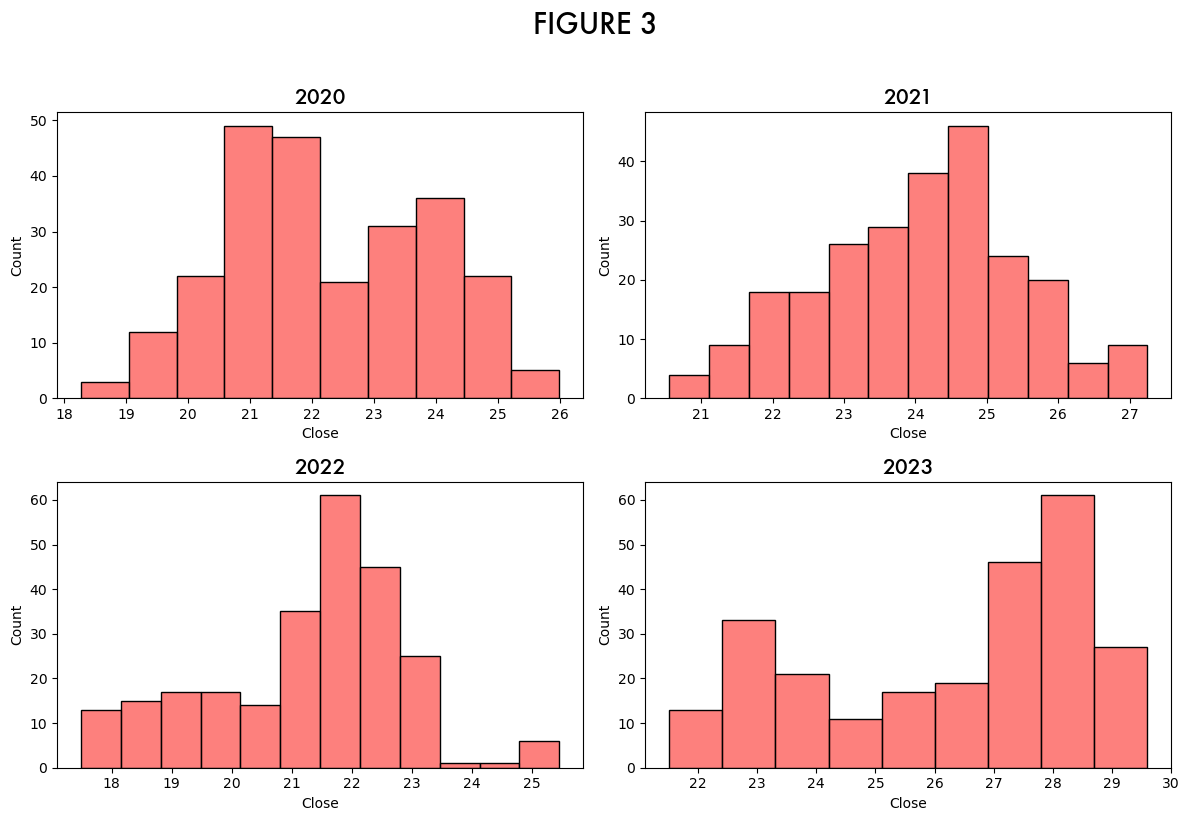

In [9]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))


sns.histplot(data = raia, x = raia["Close"].loc["2020"], ax = axes[0, 0], color = "#FD5551")
axes[0, 0].set_title("2020", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2021"], ax = axes[0, 1], color = "#FD5551")
axes[0, 1].set_title("2021", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2022"], ax = axes[1, 0], color = "#FD5551")
axes[1, 0].set_title("2022", font = "Futura", fontsize = 15)

sns.histplot(data = raia, x = raia["Close"].loc["2023"], ax = axes[1, 1], color = "#FD5551")
axes[1, 1].set_title("2023", font = "Futura", fontsize = 15)


#plt.yticks(font = "Futura", fontsize = 12)
#plt.xticks(font = "Futura", fontsize = 12)

fig.suptitle("FIGURE 3", y = 1.02, font = "Futura", fontsize = 20)

plt.tight_layout()

<Axes: xlabel='Date'>

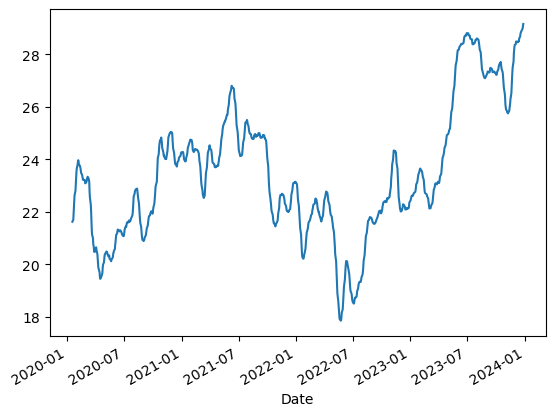

In [10]:
raia["Close"].rolling(window = 12).mean().plot()

<Axes: xlabel='Date'>

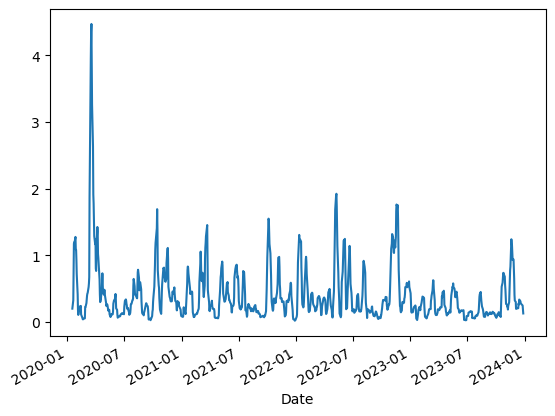

In [11]:
raia["Close"].rolling(window = 12).var().plot()

<Axes: xlabel='Date'>

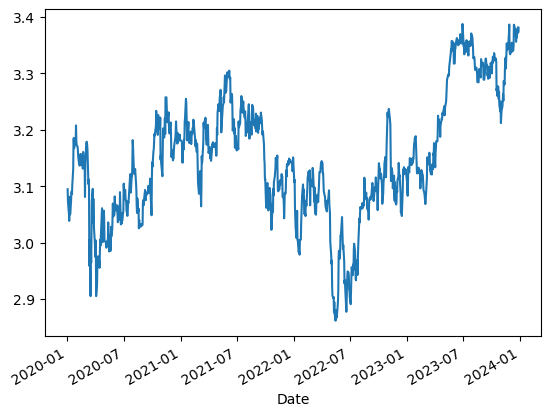

In [12]:
log_close = raia.Close.apply(lambda x: np.log(x))
log_close.plot()

In [13]:
log_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 993 entries, 2020-01-02 to 2023-12-28
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
993 non-null    float64
dtypes: float64(1)
memory usage: 15.5 KB


<Axes: xlabel='Date'>

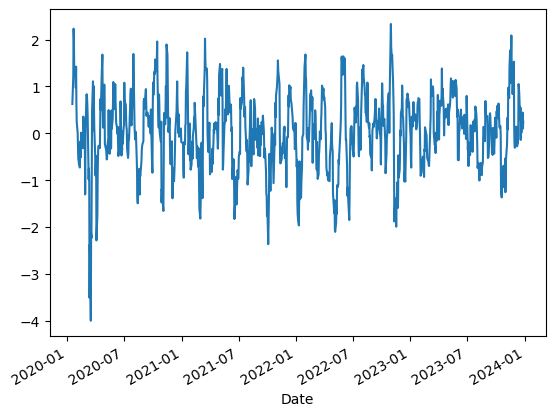

In [14]:
rolling_mean = raia["Close"].rolling(window = 12).mean()

passengers_detrended = raia["Close"] - rolling_mean

passengers_detrended.plot()

<Axes: xlabel='Date'>

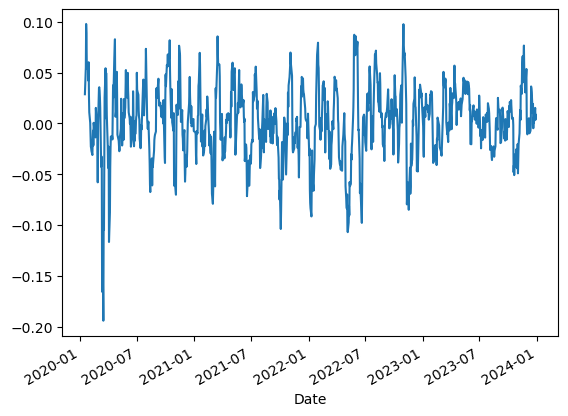

In [15]:
log_rolling_mean = log_close.rolling(window = 12).mean()
log_detrended = log_close - log_rolling_mean
log_detrended.plot()

<Axes: xlabel='Date'>

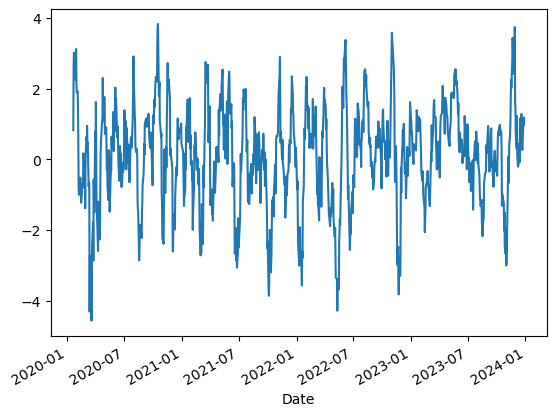

In [16]:
(raia["Close"] - raia["Close"].shift(12)).plot()

<Axes: xlabel='Date'>

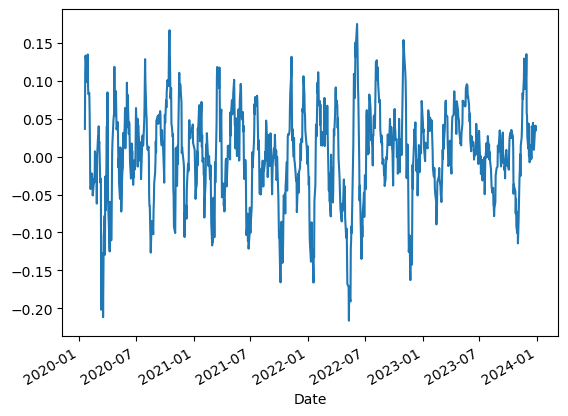

In [17]:
log_passengers_diff = log_close - log_close.shift(12)
log_passengers_diff.plot()

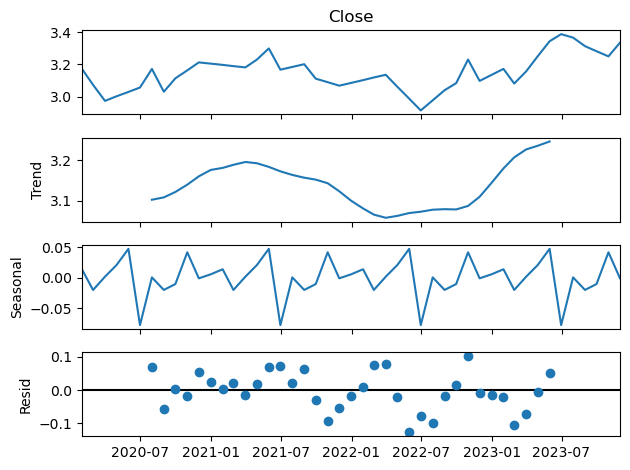

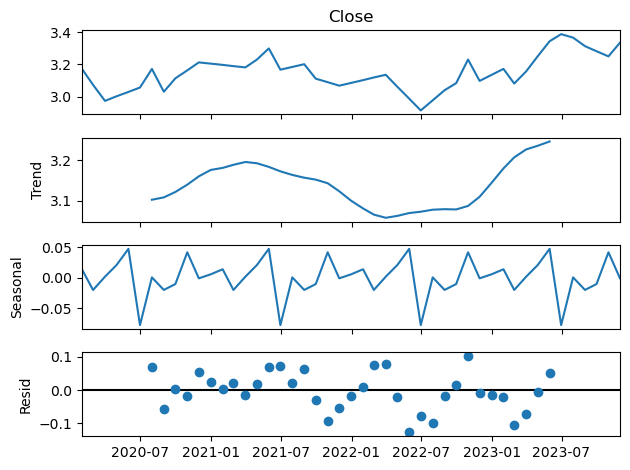

In [18]:
log_close.index = pd.to_datetime(log_close.index)

log_close = log_close.asfreq(freq='M')

log_close.interpolate(inplace=True)

decomposition = seasonal_decompose(log_close, model='additive')

decomposition.plot()

# Dicky Fuller Test

In [19]:
series = raia["Close"].values

In [20]:
result = adfuller(series, autolag = 'AIC')

In [21]:
ADF_result = adfuller(raia["Close"])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -2.095732594176349
p-value: 0.24623400560329617


In [22]:
raia_diff = np.diff(raia["Close"], n = 1)

In [23]:
ADF_result = adfuller(raia_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -34.518613006428744
p-value: 0.0


In [24]:
raia_diff = np.diff(raia["Close"], n = 2)

In [25]:
ADF_result = adfuller(raia_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -12.512273352938703
p-value: 2.658115208069674e-23


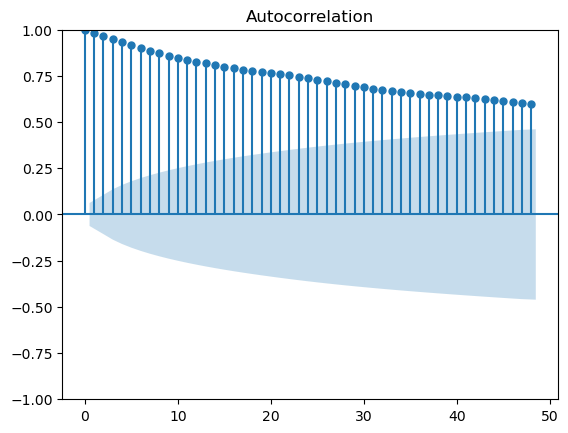

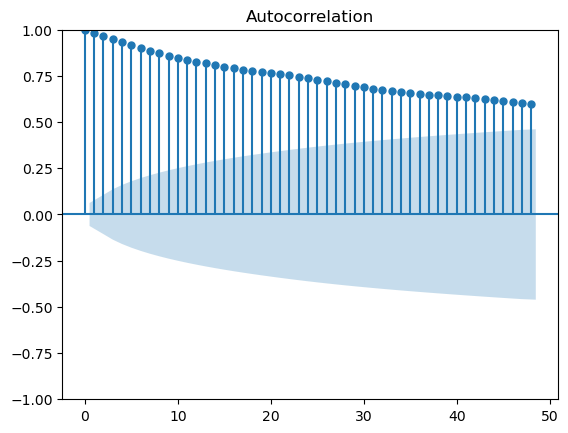

In [26]:
plot_acf(raia, lags = 48) 

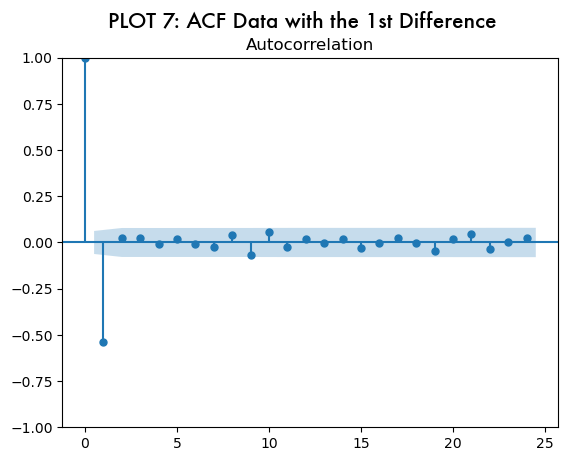

In [27]:
plot_acf(raia_diff, lags = 24)
plt.suptitle("PLOT 7: ACF Data with the 1st Difference", font = "Futura", fontsize = 15);

In [28]:
model = ARIMA(raia['Close'], order = (1, 2, 1))

results_AR = model.fit()

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
first_order_diff = raia['Close'].diff(1)

first_order_diff.head()

Date
2020-01-02         NaN
2020-01-03   -0.492307
2020-01-06   -0.425000
2020-01-07   -0.290384
2020-01-08    0.278847
Name: Close, dtype: float64

In [30]:
first_order_diff = raia['Close'].diff(2)

first_order_diff.head()

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.917307
2020-01-07   -0.715384
2020-01-08   -0.011537
Name: Close, dtype: float64

In [31]:
arima_obj = ARIMA(raia['Close'].tolist(), order = (1, 2, 1))

arima_obj_fit = arima_obj.fit()

arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  993
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -643.773
Date:                Wed, 24 Apr 2024   AIC                           1293.547
Time:                        10:35:38   BIC                           1308.243
Sample:                             0   HQIC                          1299.135
                                - 993                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0915      0.027     -3.369      0.001      -0.145      -0.038
ma.L1         -1.0000      0.413     -2.422      0.015      -1.809      -0.191
sigma2         0.2131      0.088      2.424      0.015       0.041       0.385
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               253.55
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.55   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
pred = arima_obj_fit.fittedvalues

raia['ARIMA'] = pred

diffval = arima_obj_fit.resid + arima_obj_fit.fittedvalues

raia['diffval'] = diffval

raia.head()

,Close,ARIMA,diffval
Date,,,
2020-01-02,22.082691,0.000000,22.082691
2020-01-03,21.590384,33.124036,21.590384
2020-01-06,21.165384,21.098083,21.165384
2020-01-07,20.875000,20.703653,20.875000
2020-01-08,21.153847,20.461446,21.153847


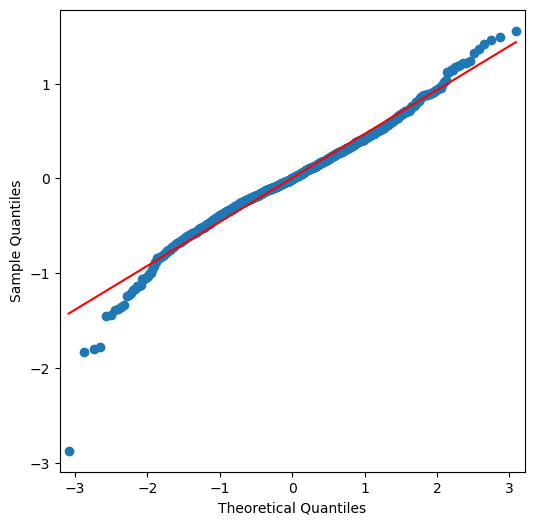

In [33]:
fig, ax = plt.subplots(figsize = (6, 6))

residuals = arima_obj_fit.resid[2:]

sm.qqplot(residuals, line = 's', ax = ax)
plt.show()

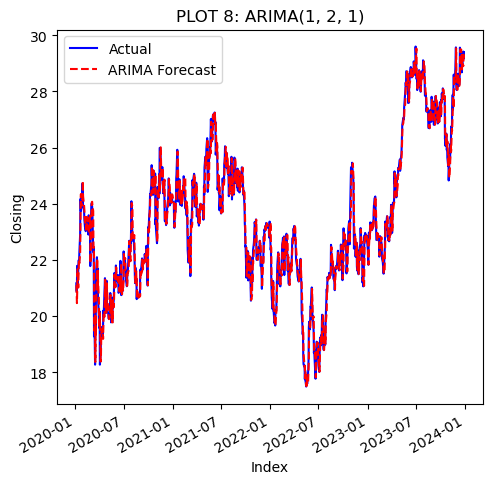

In [34]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)

raia['diffval'].iloc[2:].plot(color = 'b', linestyle = '-', ax = axarr, label = 'Actual')
raia['ARIMA'].iloc[2:].plot(color = 'r', linestyle = '--', ax = axarr, label = 'ARIMA Forecast')
axarr.set_title("PLOT 8: ARIMA(1, 2, 1)")
axarr.set_xlabel('Index')
axarr.set_ylabel('Closing')
axarr.legend() 

plt.show()